In [1]:
# Just to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Importing some libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline

In [2]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [3]:
df = pd.read_csv('week5.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [5]:
df.shape

(500, 9)

In [6]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

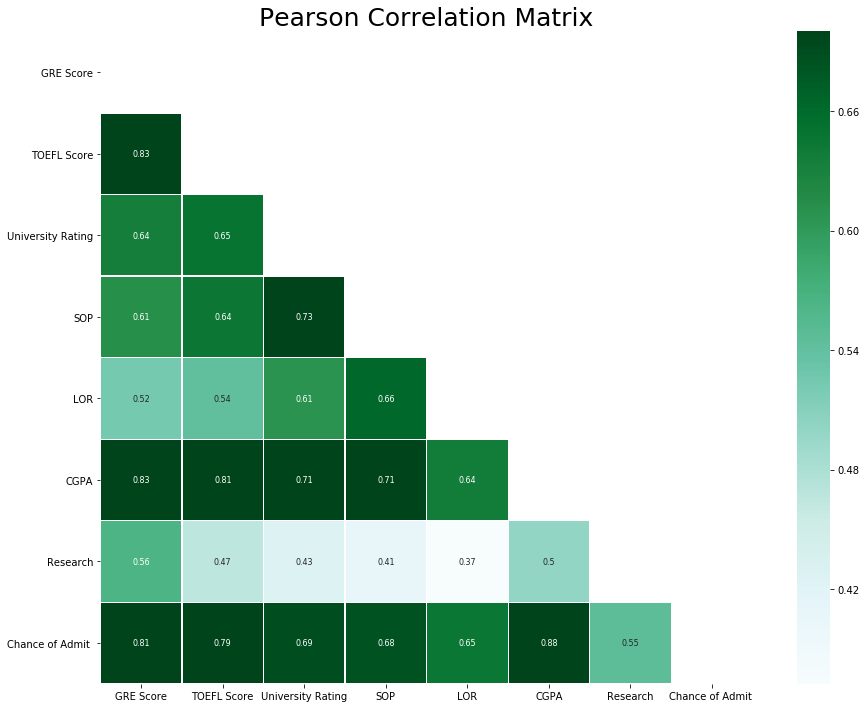

In [7]:
features = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit ']

mask = np.zeros_like(df[features].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(df[features].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse
           linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": 1});

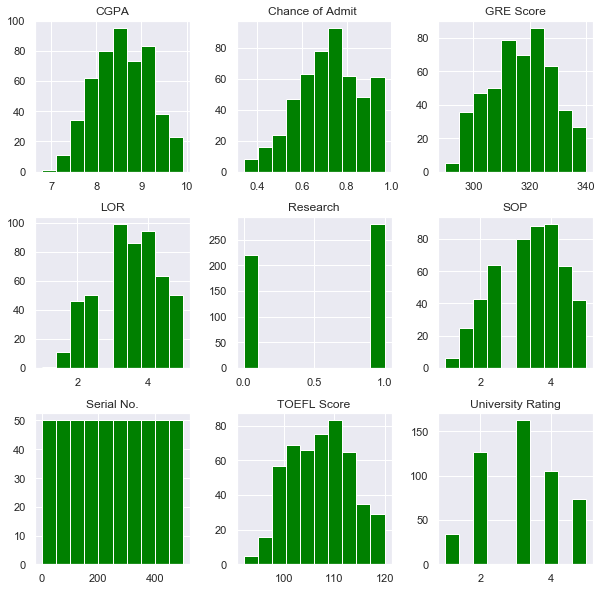

In [71]:
sns.set()
df.hist(figsize=(10,10), color='green')
plt.show()

In [8]:
df.nunique()

Serial No.           500
GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
Chance of Admit       61
dtype: int64

In [9]:
df.groupby('GRE Score').size()

GRE Score
290     2
293     1
294     2
295     5
296     5
297     6
298    10
299    10
300    12
301    11
302     7
303     5
304    12
305    11
306     7
307    10
308    13
309     9
310    11
311    16
312    24
313    12
314    16
315    13
316    18
317    15
318    12
319    12
320    16
321    17
322    17
323    13
324    23
325    15
326    12
327    17
328     9
329    10
330     8
331     9
332     8
333     4
334     8
335     4
336     5
337     2
338     4
339     3
340     9
dtype: int64

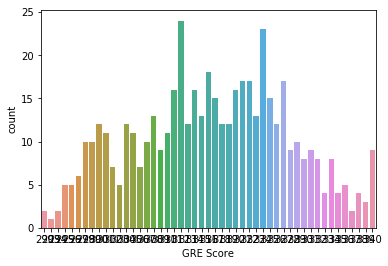

In [10]:
sns.countplot(x=df['GRE Score'])

In [11]:
df['GRE Score'].unique()

array([337, 324, 316, 322, 314, 330, 321, 308, 302, 323, 325, 327, 328,
       307, 311, 317, 319, 318, 303, 312, 334, 336, 340, 298, 295, 310,
       300, 338, 331, 320, 299, 304, 313, 332, 326, 329, 339, 309, 315,
       301, 296, 294, 306, 305, 290, 335, 333, 297, 293])

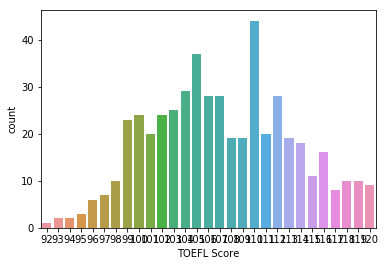

In [12]:
sns.countplot(x=df['TOEFL Score'])

In [52]:
df['TOEFL Score'].unique()

array([118, 107, 104, 110, 103, 115, 109, 101, 102, 108, 106, 111, 112,
       105, 114, 116, 119, 120,  98,  93,  99,  97, 117, 113, 100,  95,
        96,  94,  92])

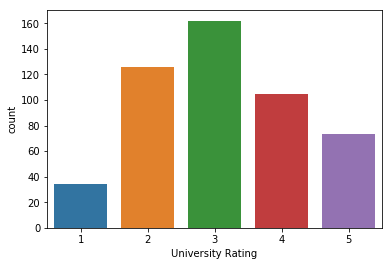

In [13]:
sns.countplot(x=df['University Rating'])

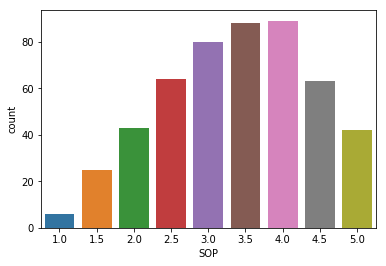

In [14]:
sns.countplot(x=df['SOP'])

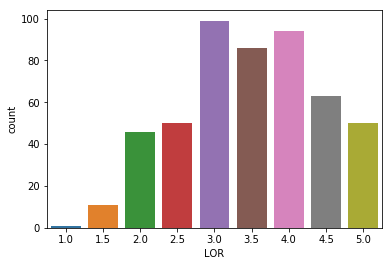

In [15]:
sns.countplot(x=df['LOR'])

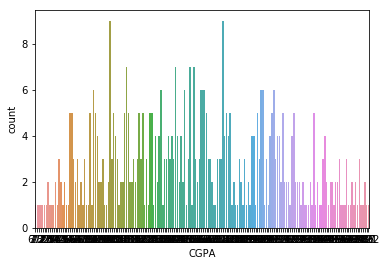

In [16]:
sns.countplot(x=df['CGPA'])

In [53]:
df['CGPA'].unique()

array([9.65, 8.87, 8.  , 8.67, 8.21, 9.34, 8.2 , 7.9 , 8.6 , 8.4 , 9.  ,
       9.1 , 8.3 , 8.7 , 8.8 , 8.5 , 9.5 , 9.7 , 9.8 , 9.6 , 7.5 , 7.2 ,
       7.3 , 8.1 , 9.4 , 9.2 , 7.8 , 7.7 , 9.3 , 8.85, 7.4 , 7.6 , 6.8 ,
       8.92, 9.02, 8.64, 9.22, 9.16, 9.64, 9.76, 9.45, 9.04, 8.9 , 8.56,
       8.72, 8.22, 7.54, 7.36, 8.02, 9.36, 8.66, 8.42, 8.28, 8.14, 8.76,
       7.92, 7.66, 8.03, 7.88, 7.84, 8.96, 9.24, 8.88, 8.46, 8.12, 8.25,
       8.47, 9.05, 8.78, 9.18, 9.46, 9.38, 8.48, 8.68, 8.34, 8.45, 8.62,
       7.46, 7.28, 8.84, 9.56, 9.48, 8.36, 9.32, 8.71, 9.35, 8.65, 9.28,
       8.77, 8.16, 9.08, 9.12, 9.15, 9.44, 9.92, 9.11, 8.26, 9.43, 9.06,
       8.75, 8.89, 8.69, 7.86, 9.01, 8.97, 8.33, 8.27, 7.98, 8.04, 9.07,
       9.13, 9.23, 8.32, 8.98, 8.94, 9.53, 8.52, 8.43, 8.54, 9.91, 9.87,
       7.65, 7.89, 9.14, 9.66, 9.78, 9.42, 9.26, 8.79, 8.23, 8.53, 8.07,
       9.31, 9.17, 9.19, 8.37, 7.68, 8.15, 8.73, 8.83, 8.57, 9.68, 8.09,
       8.17, 7.64, 8.01, 7.95, 8.49, 7.87, 7.97, 8.

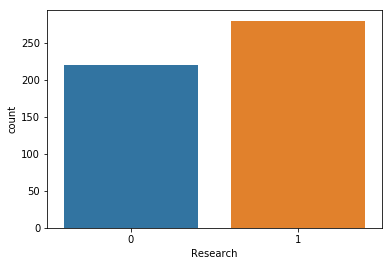

In [17]:
sns.countplot(x=df['Research'])

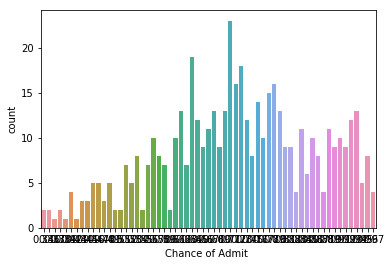

In [18]:
sns.countplot(x=df['Chance of Admit '])

In [19]:
#'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
#       'LOR', 'CGPA', 'Research', 'Chance of Admit '

x=df.drop(["University Rating", "SOP", "LOR", "Research", "Chance of Admit "], axis=1) #features
y=df["Chance of Admit "] #target
x.shape

(500, 4)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 <a list of 7 Text xticklabel objects>)

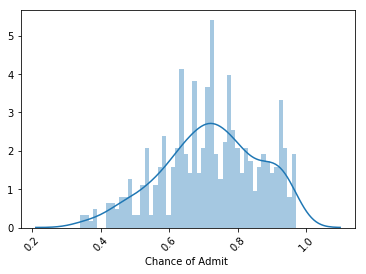

In [20]:
sns.distplot(df['Chance of Admit '],bins=50);
plt.xticks(rotation=45)

In [21]:
x = df[["GRE Score", "TOEFL Score","CGPA"]]
y = df["Chance of Admit "]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=10)

In [22]:
LM = LinearRegression()
LM.fit(x_train,y_train)
y_pred = LM.predict(x_test)
LM_r2 = r2_score(y_test, y_pred)
LM_MSE = mean_squared_error (y_test, y_pred)
LM_inter = LM.intercept_
print("R2 score:", LM_r2)
print("MSE:", LM_MSE)
print(LM_inter)

R2 score: 0.7878083439962876
MSE: 0.0036776528188190052
-1.6256384573989044


In [23]:
coeff_df = pd.DataFrame(LM.coef_,x.columns,columns=['LM_Coefficient'])
coeff_df

,LM_Coefficient
GRE Score,0.002687
TOEFL Score,0.002284
CGPA,0.146075


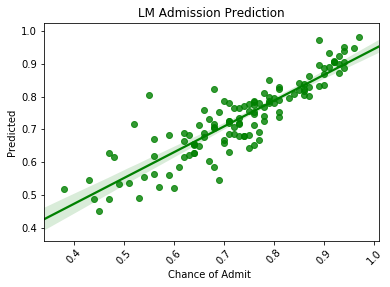

In [24]:
plt.xlabel("Historical")
plt.ylabel("Predicted")
plt.title("LM Admission Prediction")
plt.xticks(rotation=45)
sns.regplot(x=y_test, y=y_pred, data=df, color="green")

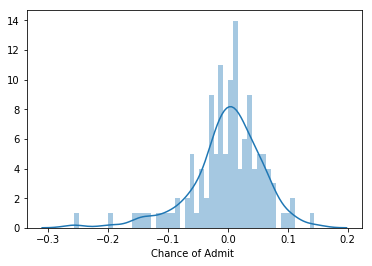

In [25]:
sns.distplot((y_test-y_pred),bins=50);

In [26]:
results = pd.DataFrame({'Model' : ["LM"], "r2_score" :[LM_r2], "mean_squared_error" :[LM_MSE], "intercept" :[LM_inter]})
results.sort_values(by="r2_score",  ascending=False)

,Model,r2_score,mean_squared_error,intercept
0,LM,0.787808,0.003678,-1.625638


In [27]:
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.25, random_state=10)

PF = LinearRegression()
PF.fit(x_train, y_train)
PF.predict(x_test)
y_pred2 = PF.predict(x_test)
PF_r2 = r2_score(y_test, y_pred2)
PF_MSE = mean_squared_error (y_test, y_pred2)
PF_inter = LM.intercept_

print("R2 score:", PF_r2)
print("MSE:", PF_MSE)
print(PF_inter)

R2 score: 0.7828257957163249
MSE: 0.0037640091019632686
-1.6256384573989044


In [28]:
coeff_df = pd.DataFrame(LM.coef_,x.columns,columns=['PF_Coefficient'])
coeff_df

,PF_Coefficient
GRE Score,0.002687
TOEFL Score,0.002284
CGPA,0.146075


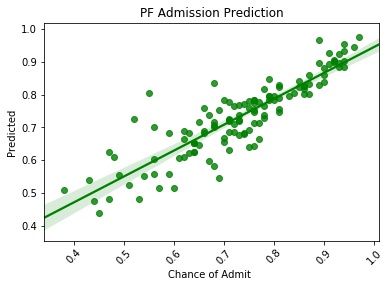

In [29]:
plt.xlabel("Historical")
plt.ylabel("Predicted")
plt.title("PF Admission Prediction")
plt.xticks(rotation=45)
sns.regplot(x=y_test, y=y_pred2, data=df, color="green")

In [30]:
DT = DecisionTreeRegressor(random_state=0).fit(x_train, y_train)
#DT.fit(x_train, y_train)
#DT.predict(x_test)
y_pred3 = DT.predict(x_test)
DT_r2 = r2_score(y_test, y_pred3)
DT_MSE = mean_squared_error (y_test, y_pred3)
#DT_inter = DT.intercept_

print("R2 score:", DT_r2)
print("MSE:", DT_MSE)
#print(DT_inter)

R2 score: 0.6793399471065543
MSE: 0.0055576


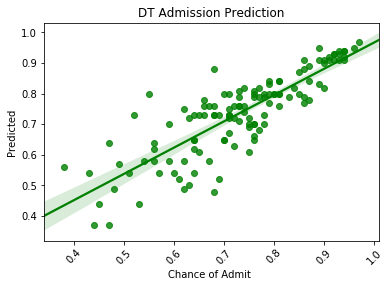

In [31]:
plt.xlabel("Historical")
plt.ylabel("Predicted")
plt.title("DT Admission Prediction")
plt.xticks(rotation=45)
sns.regplot(x=y_test, y=y_pred3, data=df, color="green")

In [32]:
RF = RandomForestRegressor(n_estimators = 100, random_state = 0).fit(x_train, y_train)
y_pred4 = RF.predict(x_test) 
RF_r2 = r2_score(y_test, y_pred4)
RF_MSE = mean_squared_error (y_test, y_pred4)

print("R2 score:", RF_r2)
print("MSE:", RF_MSE)

R2 score: 0.7570750496011965
MSE: 0.004210314606244443


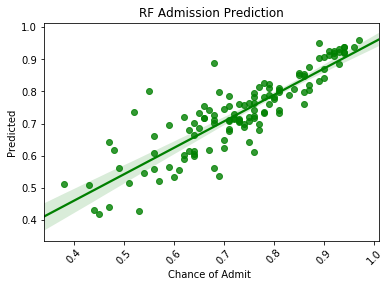

In [33]:
plt.xlabel("Historical")
plt.ylabel("Predicted")
plt.title("RF Admission Prediction")
plt.xticks(rotation=45)
sns.regplot(x=y_test, y=y_pred4, data=df, color="green")

In [34]:
KNN = KNeighborsRegressor(n_neighbors=5).fit(x_train, y_train)
y_pred5 = KNN.predict(x_test) 
KNN_r2 = r2_score(y_test, y_pred5)
KNN_MSE = mean_squared_error (y_test, y_pred5)

print("R2 score:", KNN_r2)
print("MSE:", KNN_MSE)

R2 score: 0.6676896523965635
MSE: 0.005759520000000001


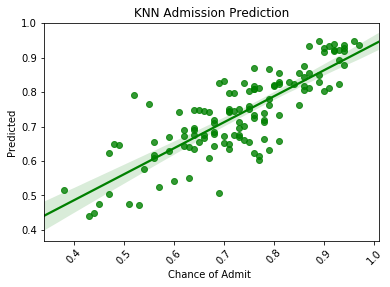

In [35]:
plt.xlabel("Historical")
plt.ylabel("Predicted")
plt.title("KNN Admission Prediction")
plt.xticks(rotation=45)
sns.regplot(x=y_test, y=y_pred5, data=df, color="green")

In [36]:
SVR = SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False).fit(x_train,y_train)
y_pred6 = SVR.predict(x_test)
SVR_r2 = r2_score(y_test, y_pred6)
SVR_MSE = mean_squared_error (y_test, y_pred6)

print("R2 score:", SVR_r2)
print("MSE:", SVR_MSE)

R2 score: 0.35968712742047393
MSE: 0.011097742885455352


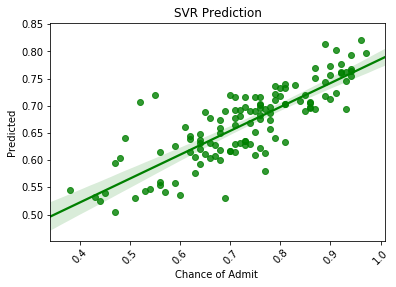

In [37]:
plt.xlabel("Historical")
plt.ylabel("Predicted")
plt.title("SVR Prediction")
plt.xticks(rotation=45)
sns.regplot(x=y_test, y=y_pred6, data=df, color="green")

In [38]:
results = pd.DataFrame({'Model' : ["LM","PF","DT","RF","KNN","SVR"], "r2_score" :[LM_r2, PF_r2, DT_r2, RF_r2, KNN_r2, SVR_r2], "mean_squared_error" :[LM_MSE, PF_MSE, DT_MSE, RF_MSE, KNN_MSE, SVR_MSE]})
results.sort_values(by="r2_score",  ascending=False)

,Model,r2_score,mean_squared_error
0,LM,0.787808,0.003678
1,PF,0.782826,0.003764
3,RF,0.757075,0.004210
2,DT,0.679340,0.005558
4,KNN,0.667690,0.005760
5,SVR,0.359687,0.011098


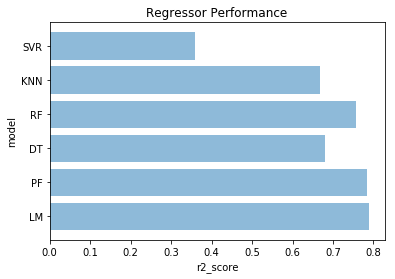

In [39]:
objects = ('LM', 'PF', 'DT', 'RF', 'KNN', 'SVR')
y_pos = np.arange(len(objects))
performance = [LM_r2, PF_r2, DT_r2, RF_r2, KNN_r2, SVR_r2]

plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.ylabel('model')
plt.xlabel('r2_score')
plt.title('Regressor Performance')

plt.show()

In [40]:
import pickle

In [41]:
# save the model to disk
filename = 'adm_model.sav'
pickle.dump(y_pred, open(filename, 'wb')) # wb stands for reading only in binary format

In [42]:
# load the model from disk
loaded_adm_model = pickle.load(open(filename, 'rb')) # rb stands for reading only in binary format

In [43]:
coef = np.array(LM.coef_)
print(LM.coef_)



[0.0026869  0.00228394 0.14607513]


In [44]:
coeffs = pd.DataFrame(LM.coef_, x.columns,columns=['Coefficient'])
coeffs

,Coefficient
GRE Score,0.002687
TOEFL Score,0.002284
CGPA,0.146075


In [45]:
inter = LM.intercept_
print(inter)

-1.6256384573989044


In [49]:
def calculate_admission(GRE_Score, TOEFL_Score, CGPA, cof):
    
    GRE_Score_coef = cof[0]
    TOEFL_Score_coef = cof[1]
    CGPA_coef = cof[2]
    
    result = (( GRE_Score_coef*GRE_Score)
              + ( TOEFL_Score_coef*TOEFL_Score)
              + (CGPA_coef*CGPA)
              + inter)
    
    return result

In [64]:
Chance_Admit = calculate_admission(GRE_Score = 200, TOEFL_Score = 120, 
                                     CGPA = 8, cof = LM.coef_)
print("The chance of admission:", round(Chance_Admit, 2))

The chance of admission: 0.35


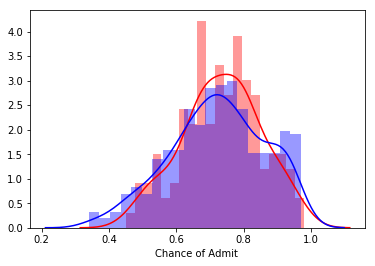

In [70]:
sns.distplot((y_pred), bins=20, color='red');
sns.distplot(df['Chance of Admit '], bins=20, color='blue')